We have already learned:
    
-- reading in messy raw text data

-- cleaning data by removing punctuation, removing stop words, stemming, and lemmatizing

-- vectorizing the text data to prepare for modeling

# Feature Engineering

Feature engineering involves creating new variables that may be helpful for prediction models

For example, we can make a new columns that contain:

-- the length of a text message

-- percent of characters in text that are punctuation

-- percent of characters that are capitalized

Power transformations change values of numerical data (e.g. log transformation, squaring data)

Transformations are important when data is skewed and has a long tail with many outliers (we usually use a log transformation in this case)

This stage requires us to be creative

In [1]:
# lets create some new features

# start by reading in data - we will create features on raw text data

import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep = '\t', header = None)

data.columns = ['label', 'text']

In [2]:
# are spam messages longer than ham messages?

# create feature for message length - we also subtract the whitespaces

data['text_length'] = data['text'].apply(lambda x: len(x) - x.count(" "))

In [3]:
data.head()

,label,text,text_length
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


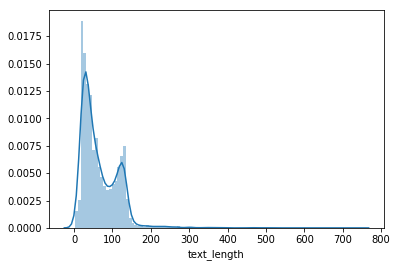

In [7]:
# visualize - not part of video lecture (just want to practice)

sns.distplot(data['text_length'], bins = 100, )

(array([1.650e+02, 1.435e+03, 1.041e+03, 6.320e+02, 4.200e+02, 3.010e+02,
        3.090e+02, 4.060e+02, 5.760e+02, 1.440e+02, 3.000e+01, 1.700e+01,
        1.600e+01, 8.000e+00, 1.100e+01, 1.200e+01, 9.000e+00, 5.000e+00,
        6.000e+00, 2.000e+00, 6.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  16.76,  31.52,  46.28,  61.04,  75.8 ,  90.56, 105.32,
        120.08, 134.84, 149.6 , 164.36, 179.12, 193.88, 208.64, 223.4 ,
        238.16, 252.92, 267.68, 282.44, 297.2 , 311.96, 326.72, 341.48,
        356.24, 371.  , 385.76, 400.52, 415.28, 430.04, 444.8 , 459.56,
        474.32, 489.08, 503.84, 518.6 , 533.36, 548.12, 562.88, 577.64,
        592.4 , 

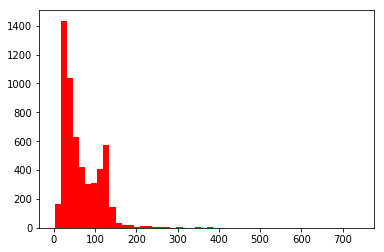

In [9]:
plt.hist(data['text_length'], color = 'r', bins = 50)

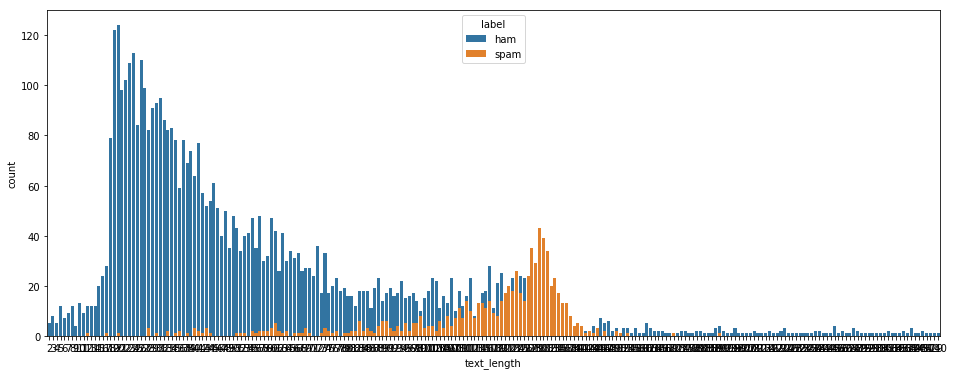

In [14]:
plt.figure(figsize=(16, 6))

sns.countplot(x = 'text_length', hue = 'label', data = data, dodge = False)

In [15]:
# back to feature engineering - lets find % of each text that is punctuation

import string

In [17]:
def count_punc(t):
    
    puncs = sum([1 for char in t if char in string.punctuation])
    
    textlen = len(t) - t.count(' ')            
    
    percentage = round(puncs / textlen, 3) * 100
    
    return percentage

In [18]:
# apply using a lambda function

data['percent_punctuation'] = data['text'].apply(lambda x: count_punc(x))

In [19]:
data.head()

,label,text,text_length,percent_punctuation
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [22]:
# data visualization from lecture video (feature evaluation)

# we are going to compare histograms for spam and ham data

# first we use numpy's linspace function to create the bins

import numpy as np

bins = np.linspace(0, 200, 40) # 40 bins evenly spaced between 0 and 200

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


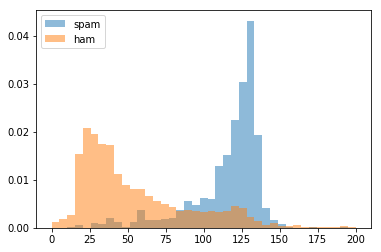

In [25]:
# time to plot - normed = True tells Python to normalize each so that the categories are comparable

plt.hist(data[data['label']=='spam']['text_length'], bins = bins, alpha = 0.5, normed = True, label = 'spam')
plt.hist(data[data['label']=='ham']['text_length'], bins = bins, alpha = 0.5, normed = True, label = 'ham')

# plot legend too

plt.legend(loc = 'upper left')

plt.show()

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


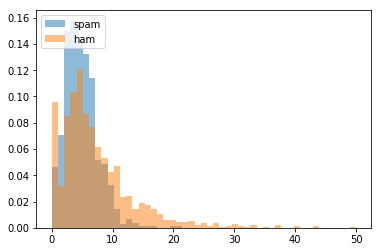

In [26]:
# plot again for the percent punctuation data

bins = np.linspace(0, 50, 50) # new bins

plt.hist(data[data['label']=='spam']['percent_punctuation'], bins = bins, alpha = 0.5, normed = True, label = 'spam')
plt.hist(data[data['label']=='ham']['percent_punctuation'], bins = bins, alpha = 0.5, normed = True, label = 'ham')

# plot legend too

plt.legend(loc = 'upper left')

plt.show()

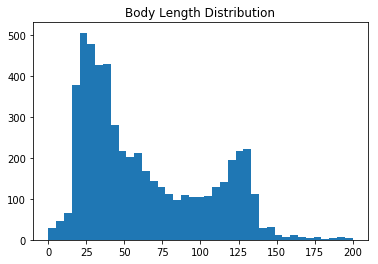

In [29]:
# big difference for length, but not much difference for percent punctuation

# the data from the histograms generally tells us whether or not a feature should be included in a model

# we are looking for skewed data in our new feature variables

# plot again with all data included - this shows a bimodal distribution

bins = np.linspace(0, 200, 40) 

plt.hist(data['text_length'], bins = bins)

plt.title("Body Length Distribution")

plt.show()

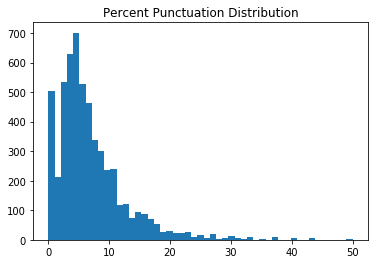

In [30]:
# again with percent punctuation - this one is much more skewed

bins = np.linspace(0, 50, 50) 

plt.hist(data['percent_punctuation'], bins = bins)

plt.title("Percent Punctuation Distribution")

plt.show()

# Box Cox Transformation

A transformation is a process that alters each data point in a certain column in a systematic way

E.g. square root of value

When data is skewed heavily towards the lower end like in the Percent Punctuation viz, we can use a log transformation to normalize it

The Box-Cox Power Transformations involve taking a value y and raising it to different values (y^x)

Transformation process:

-- Determine range of exponents to test

-- Apply transformation to each value of chosen feature

-- Use some criteria to determine which of the transformations yield the best distribution

We will visually accomplish the third step through histograms

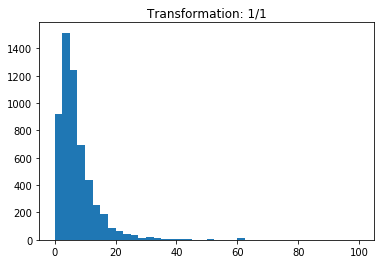

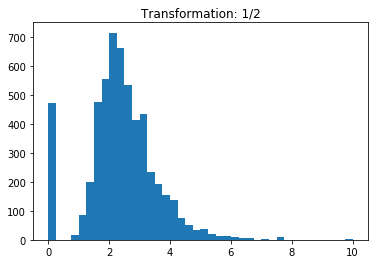

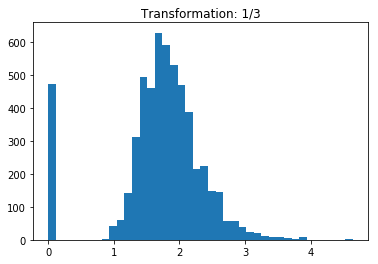

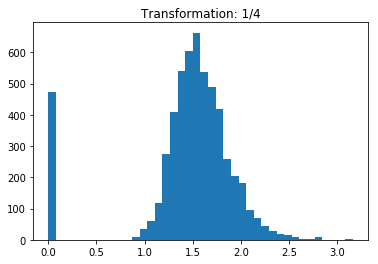

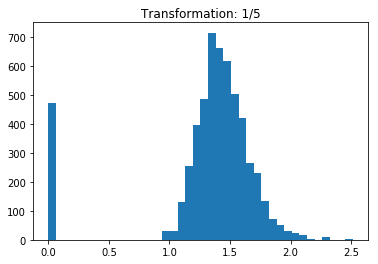

In [34]:
for i in range(1,6):
    
    plt.hist((data['percent_punctuation'])**(1/i), bins = 40)
    
    plt.title("Transformation: 1/{}".format(str(i)))
    
    plt.show()